In [1272]:
using Glob
using NPZ
using Plots
using StatsBase

# dirs = Glob.glob("../../data/simulated/Synthetic_1000_noise/dyn-SW/dyn-SW-1000-4_noise_*")
dirs = Glob.glob("../../data/simulated/Synthetic_1000_noise/dyn-BFStrange/dyn-BFStrange-1000-1_noise_*")
noise = [parse(Float64, split(split(d, "_noise_")[end], "_")[1]) for d in dirs];
dropout = [parse(Float64, split(d, "_dropout_")[end]) for d in dirs];

# ground truth
J = permutedims(npzread(joinpath(dirs[1], "J.npy")), [1, 3, 2]);
J_static = (mean(abs.(J); dims = 1)[1, :, :] .> 0.05)*1.0;
# load 
path = [joinpath(Glob.glob(joinpath(d, "locate_output_*"))[1], "G_static_cdf_velo_dot.npy") for d in dirs]
G_static_all = [try npzread(x) catch nothing end for x in path];
X_all = [npzread(joinpath(d, "X.npy")) for d in dirs];

s_vals = sort(unique(noise))
t_vals = sort(unique(dropout));

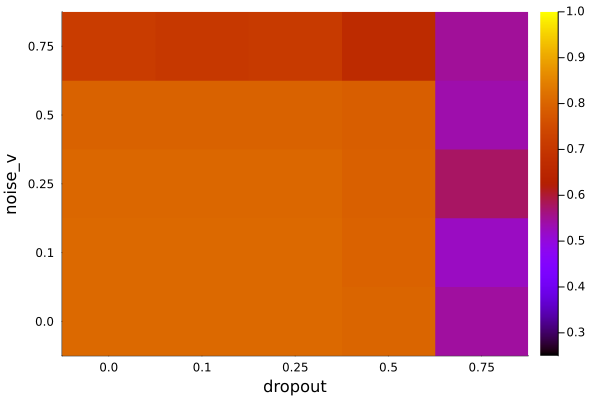

In [1273]:
y = zeros(length(s_vals), length(t_vals))
for (i, (s, t)) in enumerate(zip(noise, dropout))
    y[s_vals .== s, t_vals .== t] .= try au_prcurve(vec(J_static), vec(G_static_all[i])) catch e NaN end
end
heatmap(y; xticks = (1:length(t_vals), t_vals), yticks = (1:length(s_vals), s_vals), xlabel = "dropout", ylabel = "noise_v", clim = (0.25, 1), cmap = :gnuplot)

┌ Warning: Skipped marker arg none.
└ @ Plots ~/.julia/packages/Plots/rz1WP/src/args.jl:1148
┌ Warning: Skipped marker arg none.
└ @ Plots ~/.julia/packages/Plots/rz1WP/src/args.jl:1148
┌ Warning: Skipped marker arg none.
└ @ Plots ~/.julia/packages/Plots/rz1WP/src/args.jl:1148
┌ Warning: Skipped marker arg none.
└ @ Plots ~/.julia/packages/Plots/rz1WP/src/args.jl:1148
┌ Warning: Skipped marker arg none.
└ @ Plots ~/.julia/packages/Plots/rz1WP/src/args.jl:1148
┌ Warning: Skipped marker arg none.
└ @ Plots ~/.julia/packages/Plots/rz1WP/src/args.jl:1148
┌ Warning: Skipped marker arg none.
└ @ Plots ~/.julia/packages/Plots/rz1WP/src/args.jl:1148
┌ Warning: Skipped marker arg none.
└ @ Plots ~/.julia/packages/Plots/rz1WP/src/args.jl:1148
┌ Warning: Skipped marker arg none.
└ @ Plots ~/.julia/packages/Plots/rz1WP/src/args.jl:1148
┌ Warning: Skipped marker arg none.
└ @ Plots ~/.julia/packages/Plots/rz1WP/src/args.jl:1148
┌ Warning: Skipped marker arg none.
└ @ Plots ~/.julia/packages/Plots/

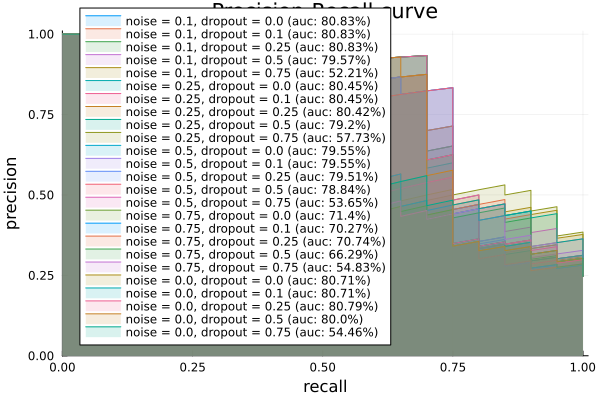

In [1274]:
using EvalMetrics
plt=plot()
for (i, (s, t)) in enumerate(zip(noise, dropout))
    try
        prplot!(vec(J_static), vec(G_static_all[i]); label = "noise = $s, dropout = $t")
    catch 
    end
end
plt

In [1275]:
# length(unique(noise))

In [1276]:
# plot([try heatmap(g; title = "s = $s, t= $t") catch e plot() end for (g, s, t) in zip(G_static_all, noise, dropout)]...; layout = (length(unique(noise)), length(unique(dropout))), colorbar = false, size = (1000, 1000))